# Load the Dataset
Let's take a look at the structure and shape of the dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from math import sin, cos, sqrt, atan2, radians
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
from xgboost import plot_importance

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/berlin-airbnb-data/listings.csv
/kaggle/input/berlin-airbnb-data/reviews_summary.csv
/kaggle/input/berlin-airbnb-data/reviews.csv
/kaggle/input/berlin-airbnb-data/listings_summary.csv
/kaggle/input/berlin-airbnb-data/calendar_summary.csv
/kaggle/input/berlin-airbnb-data/neighbourhoods.csv


In [2]:
df = pd.read_csv('/kaggle/input/berlin-airbnb-data/listings_summary.csv', sep=',')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,https://www.airbnb.com/rooms/3309,20181107122246,2018-11-07,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,https://www.airbnb.com/rooms/7071,20181107122246,2018-11-07,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,t,NaN,NaN,f,f,moderate,f,f,1,1.75


In [3]:
df.shape

(22552, 96)

# Describe the dataset
Here, we examine the dataset with more details such as column names, data type and missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22552 non-null  int64  
 1   listing_url                       22552 non-null  object 
 2   scrape_id                         22552 non-null  int64  
 3   last_scraped                      22552 non-null  object 
 4   name                              22493 non-null  object 
 5   summary                           21589 non-null  object 
 6   space                             14020 non-null  object 
 7   description                       22349 non-null  object 
 8   experiences_offered               22552 non-null  object 
 9   neighborhood_overview             11540 non-null  object 
 10  notes                             7215 non-null   object 
 11  transit                           13036 non-null  object 
 12  acce

In [5]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [6]:
# Examine the columns with missing values
df_null = df.isnull().sum()
df_null[df_null.values > 0].sort_values(ascending=False)

host_acceptance_rate           22552
thumbnail_url                  22552
jurisdiction_names             22552
xl_picture_url                 22552
medium_url                     22552
square_feet                    22106
license                        20914
monthly_price                  19893
weekly_price                   18871
notes                          15337
host_response_rate             12895
host_response_time             12894
interaction                    12146
access                         11715
host_about                     11363
house_rules                    11103
neighborhood_overview          11012
transit                         9516
security_deposit                9361
space                           8532
cleaning_fee                    7146
host_neighbourhood              5094
review_scores_value             4435
review_scores_checkin           4432
review_scores_location          4431
review_scores_communication     4418
review_scores_accuracy          4414
r

In [7]:
# Further examination of the columns with missing values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("The dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

missing_values_table(df)

The dataframe has 96 columns.
There are 53 columns that have missing values.


,Missing Values,% of Total Values
host_acceptance_rate,22552,100.0
thumbnail_url,22552,100.0
jurisdiction_names,22552,100.0
xl_picture_url,22552,100.0
medium_url,22552,100.0
square_feet,22106,98.0
license,20914,92.7
monthly_price,19893,88.2
weekly_price,18871,83.7
notes,15337,68.0


# Data Preprocessing

### Step 1: Preprocess the Price column
* Since "price" is our target variable, we need to make sure it is in good shape: no missing values, data type is correct, etc.
* From the data information, we've seen that price has no missing values

In [8]:
df['price']

0        $60.00
1        $17.00
2        $90.00
3        $26.00
4        $42.00
          ...  
22547    $60.00
22548    $20.00
22549    $85.00
22550    $99.00
22551    $45.00
Name: price, Length: 22552, dtype: object

In [9]:
df.describe(include='all')['price']

count      22552
unique       295
top       $30.00
freq        1387
mean         NaN
std          NaN
min          NaN
25%          NaN
50%          NaN
75%          NaN
max          NaN
Name: price, dtype: object

* The above indicates that the 'price' column of type object rather than int/float
* Therefore, we need to convert this column to a numeric value

In [10]:
# convert price to numeric value
df["price"] = df["price"].apply(lambda x: x.replace("$", "")) # Remove dollar sign
df["price"] = df["price"].apply(lambda x: x.replace(",", "")) # Remove thousand seperator
df["price"] = df["price"].astype("float") # Cast the column into type float
df.describe()['price']

count    22552.000000
mean        67.143668
std        220.266210
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

The description above suggests that outliers exist. ~75% of the outliers have prices of 70 dollars and lower yet the highest price is 9,000 dollars. We will look further into the possibility of eliminating the outliers.

In [11]:
# Check for outliers
print("99.5% properties have a price lower than {0: .2f}".format(np.percentile(df["price"], 99.5)))

99.5% properties have a price lower than  400.00


Since 99.5% entries are less than 400 dollars, we choose to remove the rest as outliers.

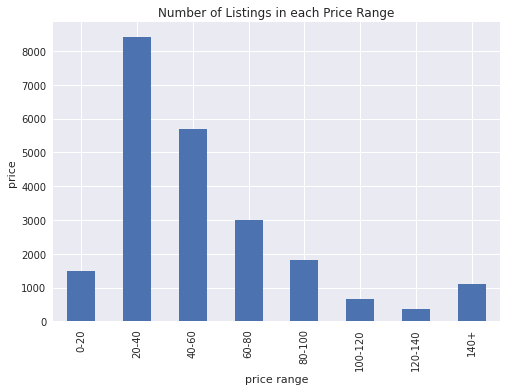

In [12]:
# Create visualization for column price range
plt.style.use("seaborn")
price_range = pd.cut(df["price"], 
                     bins=[0, 20, 40, 60, 80, 100, 120, 140, df["price"].max()], 
                     labels=["0-20", "20-40", "40-60", "60-80", "80-100", "100-120", "120-140", "140+"])
df["price_range"] = price_range 
df["price_range"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Listings in each Price Range")
plt.xlabel('price range')
plt.ylabel('price')
plt.show()

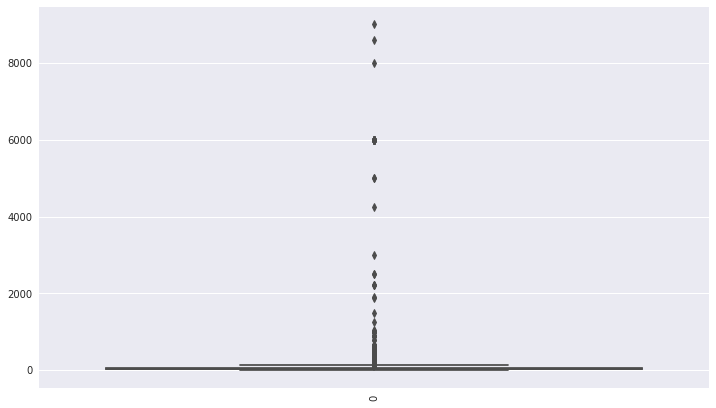

In [13]:
# Data desription to show outliers
plt.figure(figsize=(12,7))
sns.boxplot(data = df['price'],palette = "Set1")
plt.xticks(rotation=90)
plt.show()

In [14]:
def removeOutlier(att, df):

    lowerbound = att.mean() - 3 * att.std()
    upperbound = att.mean() + 3 * att.std()

    print('lowerbound: ',lowerbound,' -------- upperbound: ', upperbound )

    df1 = df[(att > lowerbound) & (att < upperbound)]

    print((df.shape[0] - df1.shape[0]), ' number of outliers from ', df.shape[0] )
    
    df = df1.copy()

    return df

lowerbound:  -593.6549625231826  -------- upperbound:  727.9422984579112
51  number of outliers from  22552


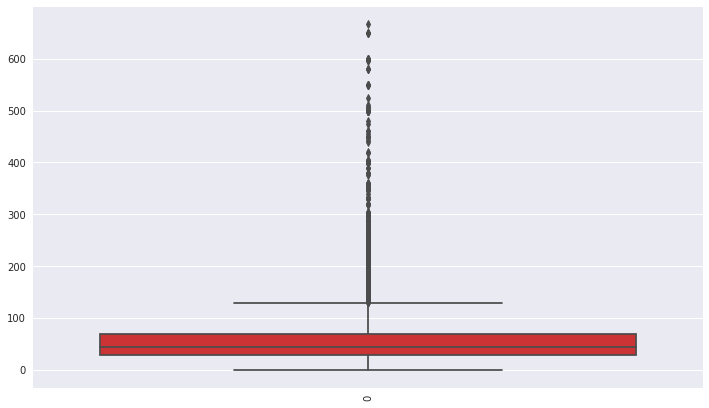

In [15]:
df = removeOutlier(df.price, df)
plt.figure(figsize=(12,7))
sns.boxplot(data = df['price'],palette = "Set1")
plt.xticks(rotation=90)
plt.show()

### Step 2: Store variable names that might be useful for exploration

With this step we will select the variables that could be helpful to explain the variation in property price.

The selection is based on the hypothesis that the following factors will affect the rent:

* Host: identity verification, super host
* Location: neighborhood, distance to top locations
* Property conditions: amenities, property types, cleaninig fee, etc
* Review scores
* Property Size
* Others: cancellation policy, instant bookable or not, etc

In [16]:
# create list for selected features
selected = []

### Host Statistics
Regarding the host information we have two hypothesis:

* If a property has a super host, its price should be higher.
* If the host of a property has been verified, the property price should be higher.

In [17]:
df_host = df.iloc[:,19:37]
df_host.head()

,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified
0,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,96%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t
1,2986,https://www.airbnb.com/users/show/2986,Michael,2008-09-16,"Berlin, Berlin, Germany",Living with my wife in Berlin. Like travellin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/50434955-1...,https://a0.muscache.com/im/pictures/50434955-1...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t
2,3718,https://www.airbnb.com/users/show/3718,Britta,2008-10-19,"Coledale, New South Wales, Australia",We love to travel ourselves a lot and prefer t...,within a day,100%,NaN,f,https://a0.muscache.com/im/users/3718/profile_...,https://a0.muscache.com/im/users/3718/profile_...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t
3,4108,https://www.airbnb.com/users/show/4108,Jana,2008-11-07,"Berlin, Berlin, Germany",ENJOY EVERY DAY AS IF IT'S YOUR LAST!!! \r\n\r...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/b5938...,https://a0.muscache.com/im/pictures/user/b5938...,Schöneberg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t
4,17391,https://www.airbnb.com/users/show/17391,Bright,2009-05-16,"Berlin, Berlin, Germany","I'm a creative person, adventurer, and travele...",within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/48c3d...,https://a0.muscache.com/im/pictures/user/48c3d...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t


In [18]:
df_host.columns

Index(['host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified'],
      dtype='object')

In [19]:
df_host.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22501 entries, 0 to 22551
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_id                    22501 non-null  int64  
 1   host_url                   22501 non-null  object 
 2   host_name                  22476 non-null  object 
 3   host_since                 22476 non-null  object 
 4   host_location              22386 non-null  object 
 5   host_about                 11155 non-null  object 
 6   host_response_time         9623 non-null   object 
 7   host_response_rate         9622 non-null   object 
 8   host_acceptance_rate       0 non-null      float64
 9   host_is_superhost          22476 non-null  object 
 10  host_thumbnail_url         22476 non-null  object 
 11  host_picture_url           22476 non-null  object 
 12  host_neighbourhood         17431 non-null  object 
 13  host_listings_count        22476 non-null  flo

In [20]:
host = ['host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count',
        'host_verifications', 'host_identity_verified']

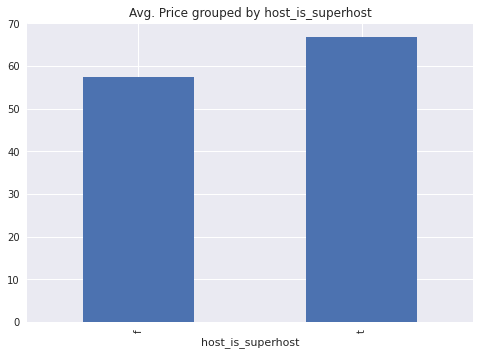

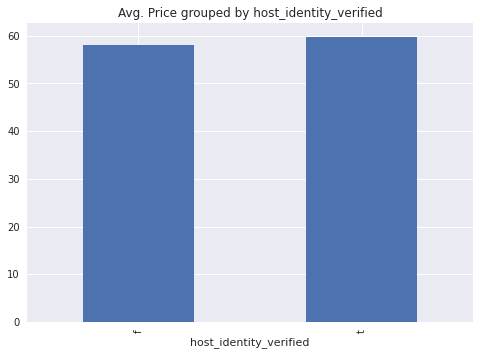

In [21]:
df.describe(include='all')[host]
for col in host:
    if df[col].nunique() <= 10:
        avg_price_host = df.groupby(col).mean()['price']
        avg_price_host.plot(kind='bar')
        plt.title('Avg. Price grouped by '+col)
        plt.show()
    else:
        continue
        

In [22]:
# fill out the missing values in columns "host_is_superhost" and "host_identity_verified"
df["host_is_superhost"] = df["host_is_superhost"].replace(np.NAN, "f")
df["host_identity_verified"] = df["host_identity_verified"].replace(np.NAN, "f")

In [23]:
# add the two columns to the 'selected' list
selected.append('host_is_superhost')
selected.append('host_identity_verified')
selected

['host_is_superhost', 'host_identity_verified']

We also notice that column "host_verifications" stores the ways of identity verification that is provided by each host. It would be nice to know which are the most frequently used ways of identity verification.

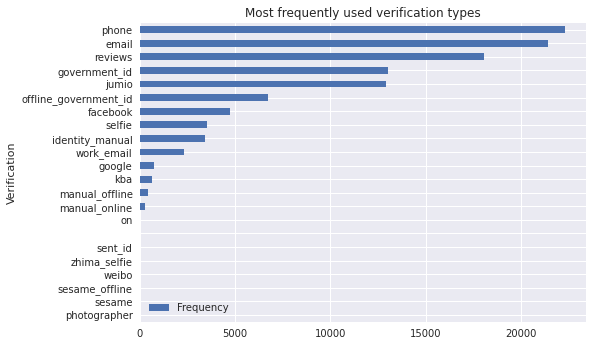

In [24]:
# 5.3 Handle host verification
df["host_ver_types"] = df["host_verifications"].apply(lambda x: x[1:-1].replace("\'", "").split(", "))
df["host_ver_type_counts"] = df["host_ver_types"].apply(lambda x: len(x))

host_ver_types = []
for i in df["host_ver_types"]:
    host_ver_types += i
host_ver_types_freq = dict((x, host_ver_types.count(x)) for x in set(host_ver_types))
host_ver_types_freq = pd.DataFrame.from_dict(host_ver_types_freq, orient="index")
host_ver_types_freq.reset_index(inplace=True)
host_ver_types_freq.columns = ["Verification", "Frequency"]
host_ver_types_freq = host_ver_types_freq.sort_values(by="Frequency", ascending=True)
host_ver_types_freq.plot.barh(x="Verification", y="Frequency")
plt.title("Most frequently used verification types")
plt.show()

### Geographical plots
The dataset also includes the latitude and longitude of each property which provides an opportunity to do geospatial plots!

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

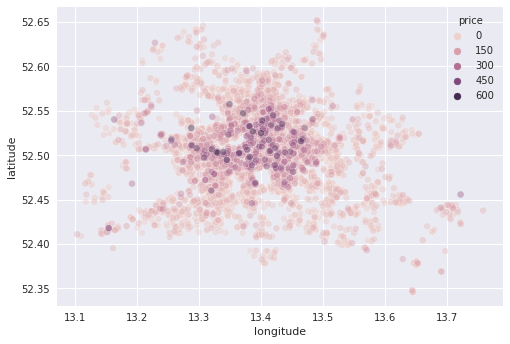

In [25]:
# create dataset
geo = df[['latitude', 'longitude', 'price', 'price_range']]
geo = geo.sort_values('price', ascending=True) # This sorting is necessary for the color scale to work properly.

# Simple scatter plot
sns.scatterplot(x="longitude", y="latitude", hue="price", data=geo, alpha=0.4)

To better evaluate the location of each listing, we would like to calcuate the distance between each listing and one of the Top5 locations in Berlin. Here we define the Top5 locations as:

* Berlin main train station (hbf)
* Berlin Tegel Airport (txl)
* Brandenburg Tor (btor)
* Museum Island (museum)
* Reichstag (reichstag)

In [26]:
# Calcuate the distance bwteen the listing and mianat tractions in Berlin
# Formula to calculate distances
def distance(lat1, lat2, lon1, lon2):
    R = 6373.0
    rlat1 = radians(lat1)
    rlat2 = radians(lat2)
    rlon1 = radians(lon1)
    rlon2 = radians(lon2)
    rdlon = rlon2 - rlon1
    rdlat = rlat2 - rlat1
    a = sin(rdlat / 2)**2 + cos(rlat1) * cos(rlat2) * sin(rdlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance
# Top locations in Berlin
toploc = {"hbf": [52.525293, 13.369359], 
          "txl": [52.558794, 13.288437], 
          "btor": [52.516497, 13.377683], 
          "museum": [52.517693, 13.402141], 
          "reichstag": [52.518770, 13.376166]}
toploc = pd.DataFrame.from_dict(toploc)
toploc_trans = toploc.transpose()
toploc_trans.columns = ["latitude", "longitude"]

# Construct distance columns
dist = []
for col in toploc.columns:
    df["dist_"+col] = df.apply(lambda x: distance(x.latitude, toploc[col][0], x.longitude, toploc[col][1]), axis=1)
    dist.append("dist_"+col)

dist_hbf_close
False    52.991467
True     64.275289
Name: price, dtype: float64
dist_txl_close
False    53.072882
True     64.193867
Name: price, dtype: float64
dist_btor_close
False    52.137588
True     65.129244
Name: price, dtype: float64
dist_museum_close
False    51.513377
True     65.753511
Name: price, dtype: float64
dist_reichstag_close
False    52.308150
True     64.958667
Name: price, dtype: float64


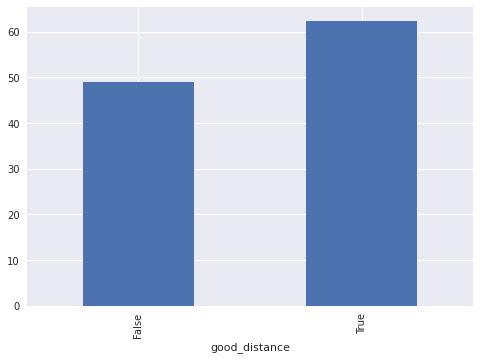

In [27]:
for col in dist:
    df[col+"_close"] = (df[col] < df[col].median())
    print(df.groupby(col+"_close").mean()["price"])
df["good_distance"] = df.apply(lambda x: any([x.dist_hbf_close, x.dist_txl_close, x.dist_museum_close, x.dist_reichstag_close]), axis=1)
df.groupby("good_distance").mean()["price"].plot(kind="bar")
plt.show()

We found that listings with a good distance (i.e. identified as "close" to any of the Top5 locations) have a sig. higher price.

In [28]:
selected.append("good_distance")
selected

['host_is_superhost', 'host_identity_verified', 'good_distance']

### Location Statistics
We would also like to explore the popularity and price level at each neighbourhood of Berlin.

In [29]:
df[['neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed']].head(10)

,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
0,Mitte,Brunnenstr. Süd,Mitte
1,NaN,Prenzlauer Berg Nordwest,Pankow
2,Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow
3,Schöneberg,Schöneberg-Nord,Tempelhof - Schöneberg
4,Prenzlauer Berg,Helmholtzplatz,Pankow
5,Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow
6,Prenzlauer Berg,Prenzlauer Berg Nordwest,Pankow
7,Friedrichshain,Frankfurter Allee Süd FK,Friedrichshain-Kreuzberg
8,Kreuzberg,nördliche Luisenstadt,Friedrichshain-Kreuzberg
9,Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow


In [30]:
# Top popular nerghbourhoods
neighbourhood_group_pop = pd.DataFrame(df["neighbourhood_group_cleansed"].value_counts())

# Average price of each neighbourhood
neighbourhood_group_price = df.groupby("neighbourhood_group_cleansed").mean()["price"]
neighbourhood_group_price = pd.DataFrame(neighbourhood_group_price)

# Create neighbourhood stats
neighbourhood_stat = pd.merge(neighbourhood_group_pop, 
                              neighbourhood_group_price, 
                              how="inner", left_index=True, right_index=True)
neighbourhood_stat.reset_index(inplace=True)
neighbourhood_stat.columns = ["neighbourhood_group_cleansed", "count_properties", "avg_price"]
neighbourhood_stat = neighbourhood_stat.sort_values(by="count_properties", ascending=False)
neighbourhood_stat

,neighbourhood_group_cleansed,count_properties,avg_price
0,Friedrichshain-Kreuzberg,5494,58.659811
1,Mitte,4615,65.371614
2,Pankow,3535,63.208487
3,Neukölln,3499,46.567305
4,Charlottenburg-Wilm.,1580,66.404430
5,Tempelhof - Schöneberg,1548,57.182171
6,Lichtenberg,687,48.917031
7,Treptow - Köpenick,595,52.216807
8,Steglitz - Zehlendorf,437,56.327231
9,Reinickendorf,246,44.882114


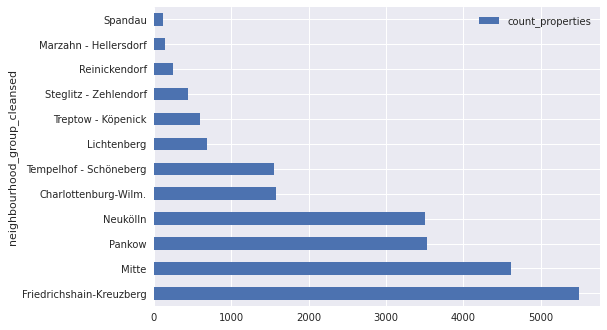

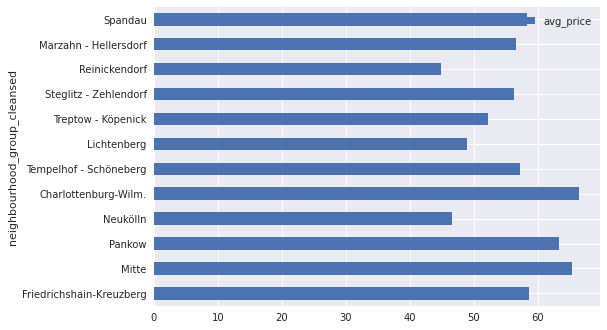

In [31]:
# Plot
ax = neighbourhood_stat.plot(x="neighbourhood_group_cleansed", y="count_properties", kind="barh")
neighbourhood_stat.plot(x="neighbourhood_group_cleansed", y="avg_price", kind="barh")
plt.show()

### Condition Statistics

In [32]:
condition = ['property_type', 'room_type', 'bed_type', 'amenities', 'cleaning_fee', 'minimum_nights']
df[condition].head()

,property_type,room_type,bed_type,amenities,cleaning_fee,minimum_nights
0,Guesthouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",$30.00,4
1,Apartment,Private room,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",$0.00,2
2,Apartment,Entire home/apt,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",$50.00,62
3,Apartment,Private room,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",$30.00,5
4,Apartment,Private room,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",$0.00,2


In [33]:
# Property type
prop_type_avg_price = df.groupby("property_type").mean()["price"]
prop_type_count_listings = df["property_type"].value_counts()
prop_type_stat = pd.merge(prop_type_count_listings, prop_type_avg_price, how="inner", left_index=True, right_index=True)
prop_type_stat.columns = ["count_prop", "avg_price"]
prop_type_stat.sort_values(by="count_prop", ascending=False).head(10)

,count_prop,avg_price
Apartment,20209,55.959127
Condominium,612,68.034314
Loft,457,106.929978
House,397,68.236776
Serviced apartment,167,122.485030
Hostel,125,45.048000
Townhouse,99,65.161616
Guest suite,74,54.662162
Bed and breakfast,64,51.921875
Guesthouse,57,74.666667


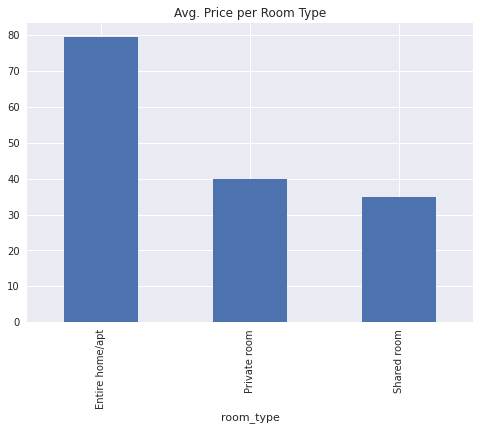

In [34]:
# Room type
room_type_avg_price = df.groupby("room_type").mean()["price"]
room_type_count_listings = df["room_type"].value_counts()
room_type_stat = pd.merge(room_type_count_listings, room_type_avg_price, how="inner", left_index=True, right_index=True)
room_type_stat.columns = ["count_prop", "avg_price"]
room_type_stat.sort_values(by="count_prop", ascending=False).head(10)
room_type_avg_price.plot(kind="bar")
plt.title("Avg. Price per Room Type")
plt.show()

In [35]:
# the different room types have a significant room types, therefore we add to the selected columns
selected.append('room_type')

In [36]:
# Amenities
df["amenities"] = df["amenities"].apply(lambda x: x[1:-1].replace("\'", "").split(","))

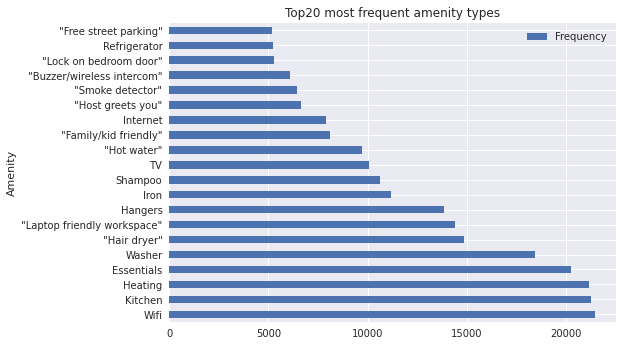

In [37]:
amenity_types = []
for i in df["amenities"]:
    amenity_types += i
amenity_types_freq = dict((x, amenity_types.count(x)) for x in set(amenity_types))
amenity_types_freq = pd.DataFrame.from_dict(amenity_types_freq, orient="index")
amenity_types_freq.reset_index(inplace=True)
amenity_types_freq.columns = ["Amenity", "Frequency"]
amenity_types_freq = amenity_types_freq.sort_values(by="Frequency", ascending=False)
amenity_types_freq.head(20).plot.barh(x="Amenity", y="Frequency")
plt.title("Top20 most frequent amenity types")
plt.show()

90%+ listings have the Top3 features: wifi, kitchen and heating. Therefore they won't have a huge impact on price. We choose to focuse on features that ~50% listings have. They are:

* Hair dryer
* Laptop friendly workspace
* Hanger

In [38]:
df["with_hair_dryer"] = df["amenities"].apply(lambda x: '"Hair dryer"' in x)
df["lap_friendly"] = df["amenities"].apply(lambda x: '"Laptop friendly workspace"' in x)
df["with_hanger"] = df["amenities"].apply(lambda x: "Hangers" in x)
for i in ["with_hair_dryer", "lap_friendly", "with_hanger"]:
    selected.append(i)

In [39]:
# minimum nights
df["min_nights_greater_than_two"] = df["minimum_nights"] > 2

The number of nights spent will definitely have an effect on the price so we add to the selected columns

In [40]:
selected.append("min_nights_greater_than_two")

In [41]:
df.describe(include='all')['cleaning_fee']

count     15393
unique      111
top       $0.00
freq       1862
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: cleaning_fee, dtype: object

In [42]:
# Cleaning fee
# Remove dollar sign
df["cleaning_fee"][-df["cleaning_fee"].isna()] = df["cleaning_fee"][-df["cleaning_fee"].isna()].apply(lambda x: x.replace("$", "").replace(",", ""))
df["cleaning_fee"] = df["cleaning_fee"].astype("float")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
df.describe()['cleaning_fee']

count    15393.000000
mean        26.556227
std         26.014985
min          0.000000
25%         10.000000
50%         20.000000
75%         35.000000
max        450.000000
Name: cleaning_fee, dtype: float64

In [44]:
df['cleaning_fee'].fillna(method="pad", inplace=True)

In [45]:
df['cleaning_fee'].isna().sum()

0

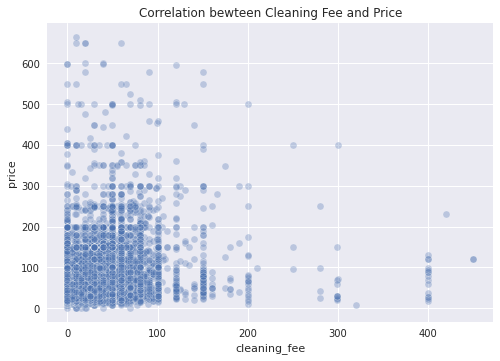

In [46]:
df["cleaning_fee"].isna().sum() # Check missing values
sns.scatterplot(x="cleaning_fee", y="price", data=df, alpha=0.3)
plt.title("Correlation bewteen Cleaning Fee and Price")
plt.show()

There's correlation between Cleaning fee and price, hence it should be selected

In [47]:
selected.append('cleaning_fee')
selected

['host_is_superhost',
 'host_identity_verified',
 'good_distance',
 'room_type',
 'with_hair_dryer',
 'lap_friendly',
 'with_hanger',
 'min_nights_greater_than_two',
 'cleaning_fee']

### Review Statistics

In [48]:
review = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
          'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
df[review].head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,93.0,10.0,9.0,10.0,10.0,10.0,9.0
1,100.0,10.0,10.0,10.0,10.0,10.0,10.0
2,92.0,9.0,9.0,9.0,9.0,10.0,9.0
3,88.0,9.0,9.0,9.0,10.0,9.0,9.0
4,96.0,10.0,10.0,10.0,10.0,10.0,9.0


<AxesSubplot:>

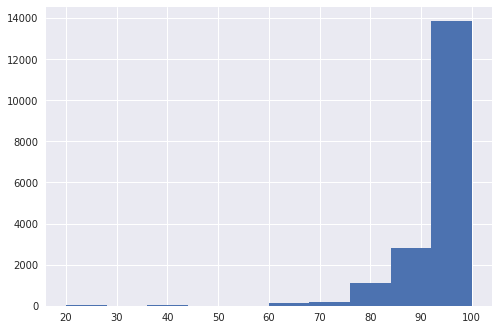

In [49]:
# Examine the distribution of score ratings
df["review_scores_rating"].hist()

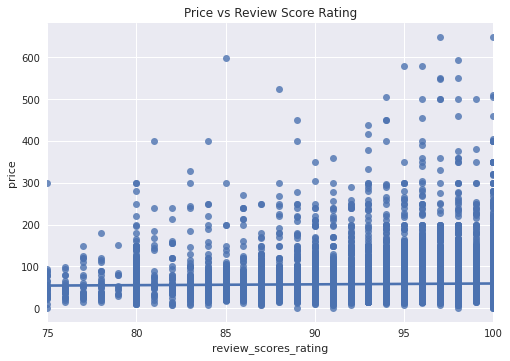

In [50]:
# Scatter plot between review score and price
sns.regplot(x="review_scores_rating", y="price", data=df[df["review_scores_rating"]>=75])
plt.title("Price vs Review Score Rating")
plt.show()

There's no significant correlation between review score and price

### Size Statistics

In [51]:
# Look at size-related variables
size = ['space', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'square_feet']
df[size].head()

,space,accommodates,bathrooms,bedrooms,beds,square_feet
0,A+++ location! This „Einliegerwohnung“ is an e...,3,1.0,1.0,2.0,NaN
1,In the summertime we are spending most of our ...,2,1.0,1.0,1.0,NaN
2,1st floor (68m2) apartment on Kollwitzplatz/ P...,4,1.0,1.0,2.0,720.0
3,"Your room is really big and has 26 sqm, is ver...",2,1.0,1.0,1.0,0.0
4,"The BrightRoom is an approx. 20 sqm (215ft²), ...",2,1.0,1.0,2.0,NaN


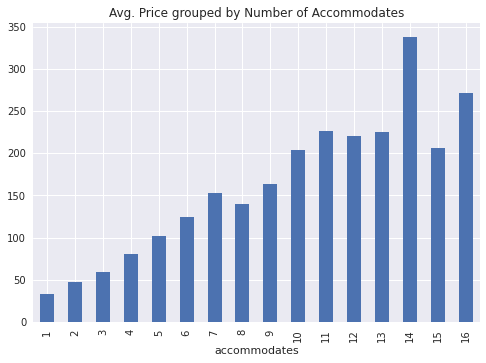

In [52]:
df.groupby("accommodates").mean()["price"].plot(kind="bar")
plt.title("Avg. Price grouped by Number of Accommodates")
plt.show()

Accommodates has a significant correlation with price

In [53]:
selected.append("accommodates")
selected

['host_is_superhost',
 'host_identity_verified',
 'good_distance',
 'room_type',
 'with_hair_dryer',
 'lap_friendly',
 'with_hanger',
 'min_nights_greater_than_two',
 'cleaning_fee',
 'accommodates']

In [54]:
# Others
others = ['instant_bookable', 'is_business_travel_ready', 'cancellation_policy']
df[others].head()

,instant_bookable,is_business_travel_ready,cancellation_policy
0,f,f,strict_14_with_grace_period
1,f,f,flexible
2,t,f,strict_14_with_grace_period
3,f,f,strict_14_with_grace_period
4,f,f,moderate


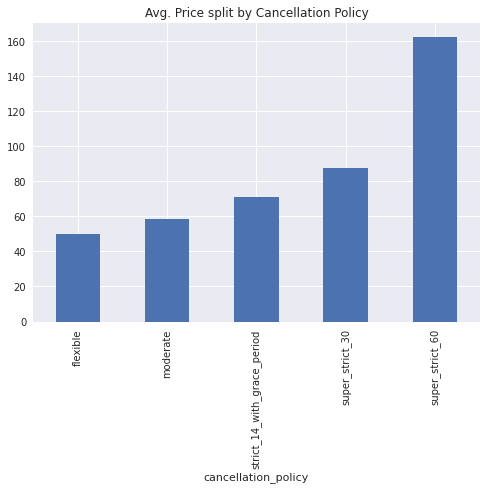

In [55]:
df.groupby("cancellation_policy").mean()["price"].plot(kind="bar")
plt.title("Avg. Price split by Cancellation Policy")
plt.show()

There's a correlation between the cancellation policy and price

In [56]:
df["cancellation_non_flexible"] = df["cancellation_policy"]!="flexible"
df["cancellation_non_flexible"].value_counts()
selected.append('cancellation_policy')
selected

['host_is_superhost',
 'host_identity_verified',
 'good_distance',
 'room_type',
 'with_hair_dryer',
 'lap_friendly',
 'with_hanger',
 'min_nights_greater_than_two',
 'cleaning_fee',
 'accommodates',
 'cancellation_policy']

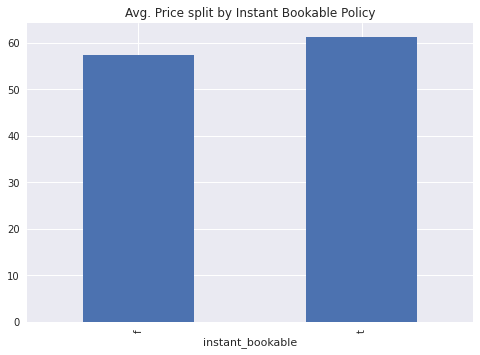

['host_is_superhost',
 'host_identity_verified',
 'good_distance',
 'room_type',
 'with_hair_dryer',
 'lap_friendly',
 'with_hanger',
 'min_nights_greater_than_two',
 'cleaning_fee',
 'accommodates',
 'cancellation_policy',
 'instant_bookable']

In [57]:
# Instant bookable
df.groupby("instant_bookable").mean()["price"].plot(kind="bar")
plt.title("Avg. Price split by Instant Bookable Policy")
plt.show()
selected.append("instant_bookable")
selected

# Feature Engineering
We need to do some final preprocessing on the selected features before they are fed into a model

In [58]:
df[selected].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22501 entries, 0 to 22551
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            22501 non-null  object 
 1   host_identity_verified       22501 non-null  object 
 2   good_distance                22501 non-null  bool   
 3   room_type                    22501 non-null  object 
 4   with_hair_dryer              22501 non-null  bool   
 5   lap_friendly                 22501 non-null  bool   
 6   with_hanger                  22501 non-null  bool   
 7   min_nights_greater_than_two  22501 non-null  bool   
 8   cleaning_fee                 22501 non-null  float64
 9   accommodates                 22501 non-null  int64  
 10  cancellation_policy          22501 non-null  object 
 11  instant_bookable             22501 non-null  object 
dtypes: bool(5), float64(1), int64(1), object(5)
memory usage: 2.0+ MB


In [59]:
# Convert string variables into categorical variables
df["host_is_superhost"] = df["host_is_superhost"]=="t"
df["host_identity_verified"] = df["host_identity_verified"]=="t"

In [60]:
for col in df[selected].select_dtypes("bool").columns:
    df[col] = df[col].astype("int")
df[selected].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22501 entries, 0 to 22551
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            22501 non-null  int64  
 1   host_identity_verified       22501 non-null  int64  
 2   good_distance                22501 non-null  int64  
 3   room_type                    22501 non-null  object 
 4   with_hair_dryer              22501 non-null  int64  
 5   lap_friendly                 22501 non-null  int64  
 6   with_hanger                  22501 non-null  int64  
 7   min_nights_greater_than_two  22501 non-null  int64  
 8   cleaning_fee                 22501 non-null  float64
 9   accommodates                 22501 non-null  int64  
 10  cancellation_policy          22501 non-null  object 
 11  instant_bookable             22501 non-null  object 
dtypes: float64(1), int64(8), object(3)
memory usage: 2.7+ MB


In [61]:
data = df[selected]
data.head(10)

,host_is_superhost,host_identity_verified,good_distance,room_type,with_hair_dryer,lap_friendly,with_hanger,min_nights_greater_than_two,cleaning_fee,accommodates,cancellation_policy,instant_bookable
0,1,1,1,Entire home/apt,1,1,1,1,30.0,3,strict_14_with_grace_period,f
1,0,1,1,Private room,1,1,0,0,0.0,2,flexible,f
2,0,1,1,Entire home/apt,1,1,1,1,50.0,4,strict_14_with_grace_period,t
3,0,1,1,Private room,1,1,1,1,30.0,2,strict_14_with_grace_period,f
4,1,1,1,Private room,1,1,1,0,0.0,2,moderate,f
5,0,1,1,Entire home/apt,1,0,1,1,80.0,7,strict_14_with_grace_period,f
6,0,0,1,Entire home/apt,0,0,1,1,0.0,2,strict_14_with_grace_period,f
7,0,1,1,Private room,0,0,0,1,0.0,2,strict_14_with_grace_period,f
8,0,0,1,Entire home/apt,1,1,1,1,50.0,5,strict_14_with_grace_period,f
9,1,1,1,Private room,1,1,1,1,18.0,2,strict_14_with_grace_period,f


In [62]:
data.isnull().sum()

host_is_superhost              0
host_identity_verified         0
good_distance                  0
room_type                      0
with_hair_dryer                0
lap_friendly                   0
with_hanger                    0
min_nights_greater_than_two    0
cleaning_fee                   0
accommodates                   0
cancellation_policy            0
instant_bookable               0
dtype: int64

In [63]:
data['cleaning_fee'].isnull().sum()

0

In [64]:
# Encode the categorical varibles  
le = LabelEncoder()
  
data['room_type']= le.fit_transform(data['room_type'])
data['cancellation_policy']= le.fit_transform(data['cancellation_policy'])
data['instant_bookable'] = np.where(data['instant_bookable'] == 't', 1, 0)

data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,host_is_superhost,host_identity_verified,good_distance,room_type,with_hair_dryer,lap_friendly,with_hanger,min_nights_greater_than_two,cleaning_fee,accommodates,cancellation_policy,instant_bookable
0,1,1,1,0,1,1,1,1,30.0,3,2,0
1,0,1,1,1,1,1,0,0,0.0,2,0,0
2,0,1,1,0,1,1,1,1,50.0,4,2,1
3,0,1,1,1,1,1,1,1,30.0,2,2,0
4,1,1,1,1,1,1,1,0,0.0,2,1,0


In [65]:
#  Standardisation
sc = StandardScaler()
scaledFeatures = sc.fit_transform(data)

In [66]:
# split to training and test set
X = scaledFeatures
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling

## Linear Regression

In [67]:
model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
score_lr = r2_score(y_test, y_test_pred)
print("R^2 score is: {0: .4f}".format(r2_score(y_test, y_test_pred)))
print("RMSE is: {0: .4f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

R^2 score is:  0.3843
RMSE is:  38.4892


## XGBoost

In [68]:
xgb_clf = xgb.XGBRegressor(n_estimators=100, max_depth=5)
xgb_clf.fit(X_train, y_train)
y_test_pred = xgb_clf.predict(X_test)
score_xg = r2_score(y_test, y_test_pred)
print("R^2 score is: {0: .4f}".format(r2_score(y_test, y_test_pred)))
print("RMSE is: {0: .4f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

R^2 score is:  0.3894
RMSE is:  38.3277


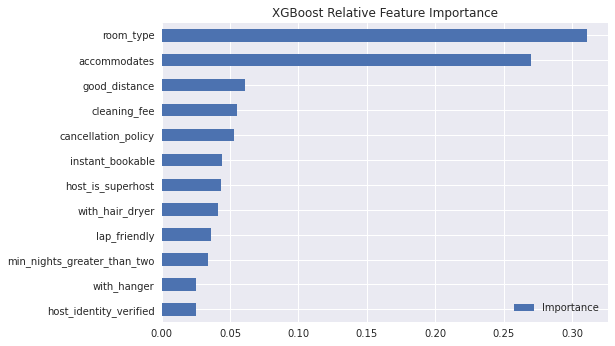

In [69]:
# Plot feature importance
featureImport = pd.DataFrame(xgb_clf.feature_importances_, index=selected)
featureImport.columns = ["Importance"]
featureImport.sort_values(["Importance"], ascending=True).plot(kind="barh")
plt.title("XGBoost Relative Feature Importance")
plt.show()

### Model Comparison

Text(0.5, 1.0, 'Model Results')

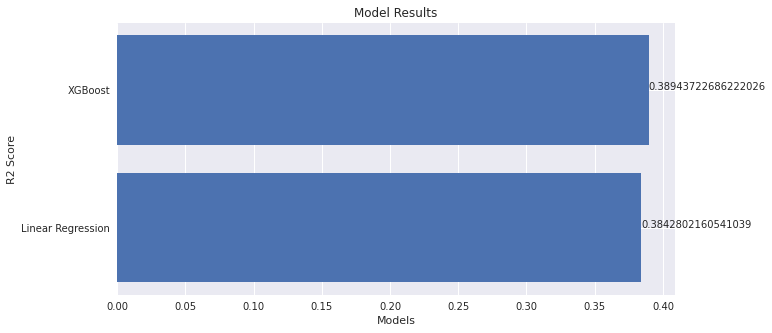

In [70]:
results = [score_lr, score_xg]
names = ['Linear Regression', 'XGBoost']
plt.figure(figsize=(10, 5))
plt.barh(names,results)

for index, value in enumerate(results):
    plt.text(value, index, str(value))
plt.xlabel('Models')
plt.ylabel("R2 Score")
plt.title('Model Results')